Necessary libraries are imported

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Training and test data are obtained and are displayed for understanding

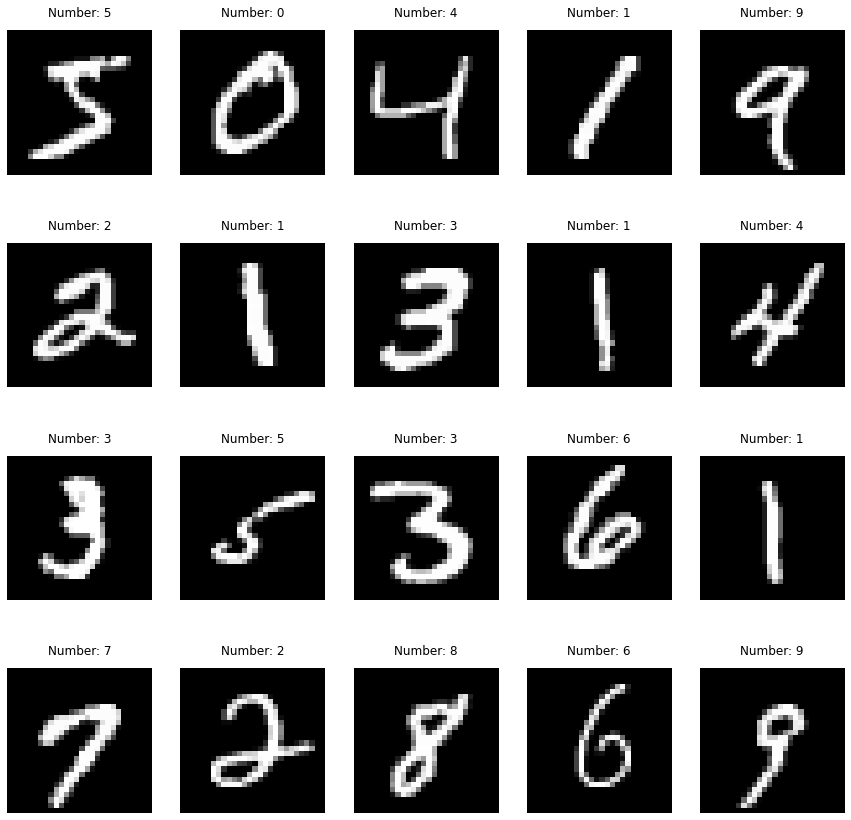

In [55]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

fig, axs = plt.subplots(4, 5, figsize=(15, 15))
for i, ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.set_title(f"Number: {y_train[i]}")
  ax.axis('off')
fig.show()

Preprocessing the data for further convinient use

In [56]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print(x_train[1])
print(x_test[1])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Creating the model and adding the respective layers

In [57]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Model template is created
model = Sequential()

# Adding the layers one by one
model.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation=tf.nn.relu))
model.add(Dropout(0.15))
model.add(Dense(30, activation=tf.nn.softmax))

Evaluating the model and modifying it to take the data (fitting the data)

In [59]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1519 - accuracy: 0.9539
Epoch 2/3
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0768 - accuracy: 0.9765
Epoch 3/3
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0553 - accuracy: 0.9826


Predicting the actual test data

In [60]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0647 - accuracy: 0.9808


[0.06466389447450638, 0.9807999730110168]